In [0]:
! pip install comet-ml

In [0]:
! git clone https://github.com/dudeperf3ct/TextRecognizer.git

In [3]:
%cd TextRecognizer/Experiment-1/notebooks

/content/TextRecognizer/Experiment-1/notebooks


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [5]:
import tensorflow as tf
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

Default GPU Device: /device:GPU:0


In [0]:
import sys
sys.path.append('..')

In [0]:
from src.data.emnist_dataset import EMNIST
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from collections import defaultdict

In [8]:
dataset = EMNIST()
(x_train, y_train), (x_test, y_test) = dataset.load_data()

0.00B [00:00, ?B/s]

[INFO] Downloading raw dataset...


709MB [00:18, 40.5MB/s]                           


[INFO] Download complete..
[INFO] Unzipping raw dataset...
[INFO] Unzipping complete
[INFO] Loading training and test data from .mat file...
[INFO] Saving to HDF5 in a compressed format...
[INFO] Saving essential dataset parameters...
[INFO] Cleaning up...


In [9]:
print(dataset)
print('Training shape:', x_train.shape, y_train.shape)
print('Test shape:', x_test.shape, y_test.shape)

EMNIST Dataset
Num classes: 62
Mapping: {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z', 36: 'a', 37: 'b', 38: 'c', 39: 'd', 40: 'e', 41: 'f', 42: 'g', 43: 'h', 44: 'i', 45: 'j', 46: 'k', 47: 'l', 48: 'm', 49: 'n', 50: 'o', 51: 'p', 52: 'q', 53: 'r', 54: 's', 55: 't', 56: 'u', 57: 'v', 58: 'w', 59: 'x', 60: 'y', 61: 'z'}
Input shape: [28, 28]

Training shape: (697932, 28, 28) (697932, 62)
Test shape: (116323, 28, 28) (116323, 62)


## EDA

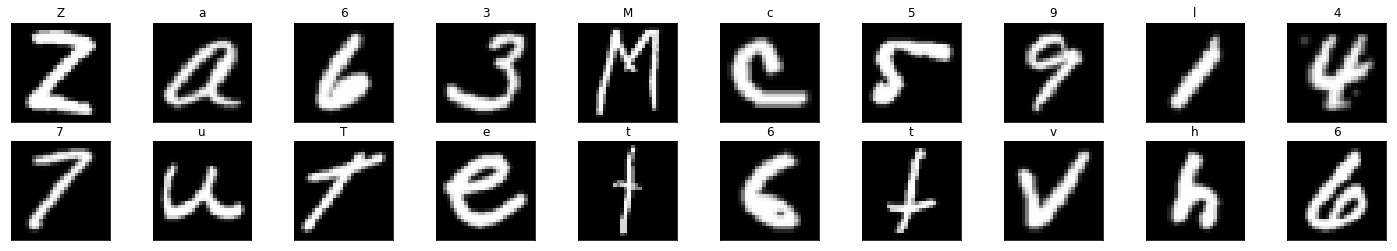

In [10]:
classes = dataset.mapping
# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(x_train[idx], cmap='gray')
    # print out the correct label for each image
    ax.set_title(str(classes[np.where(y_train[idx]==1)[0][0]]))

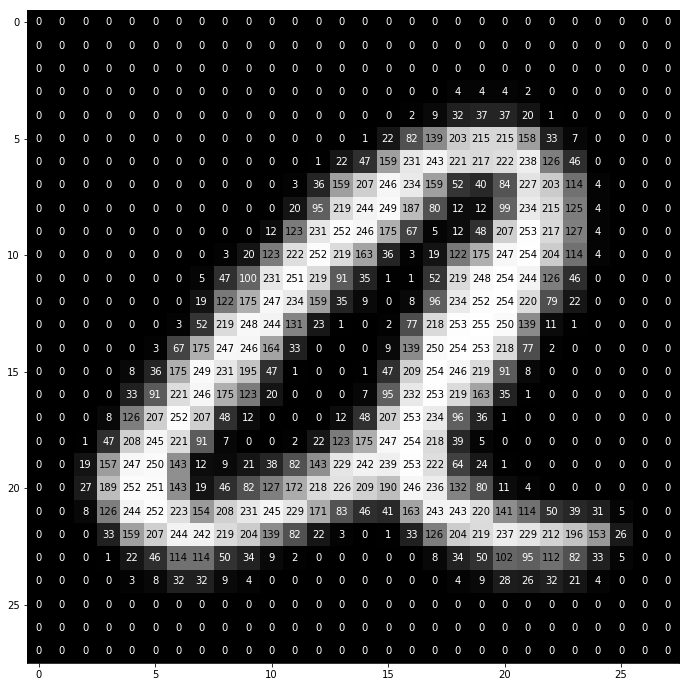

In [11]:
img = x_train[1]

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')

In [0]:
def distribution(labels, classes):
    
    lbl_dist = dict.fromkeys(value for key,value in classes.items())
    lbl_dist = defaultdict(lambda:1)
    for idx in tqdm(range(len(labels))):
        lbl_dist[classes[np.where(labels[idx]==1)[0][0]]] += 1
    return lbl_dist

In [13]:
distribution(y_train, classes)

100%|██████████| 697932/697932 [00:01<00:00, 407193.28it/s]


defaultdict(<function __main__.distribution.<locals>.<lambda>>,
            {'0': 34586,
             '1': 38375,
             '2': 34204,
             '3': 35144,
             '4': 33536,
             '5': 31417,
             '6': 34233,
             '7': 35755,
             '8': 33947,
             '9': 33848,
             'A': 6408,
             'B': 3879,
             'C': 10095,
             'D': 4563,
             'E': 4935,
             'F': 9183,
             'G': 2518,
             'H': 3153,
             'I': 11947,
             'J': 3763,
             'K': 2469,
             'L': 5077,
             'M': 9003,
             'N': 8238,
             'O': 24984,
             'P': 8348,
             'Q': 2606,
             'R': 5074,
             'S': 20765,
             'T': 9821,
             'U': 12603,
             'V': 4638,
             'W': 4696,
             'X': 2772,
             'Y': 4744,
             'Z': 2702,
             'a': 10034,
             'b': 5160,
        

In [14]:
distribution(y_test, classes)

100%|██████████| 116323/116323 [00:00<00:00, 368422.38it/s]


defaultdict(<function __main__.distribution.<locals>.<lambda>>,
            {'0': 5779,
             '1': 6331,
             '2': 5870,
             '3': 5970,
             '4': 5620,
             '5': 5191,
             '6': 5706,
             '7': 6140,
             '8': 5634,
             '9': 5687,
             'A': 1063,
             'B': 649,
             'C': 1740,
             'D': 780,
             'E': 852,
             'F': 1441,
             'G': 448,
             'H': 522,
             'I': 2049,
             'J': 627,
             'K': 383,
             'L': 811,
             'M': 1486,
             'N': 1352,
             'O': 4157,
             'P': 1398,
             'Q': 414,
             'R': 810,
             'S': 3509,
             'T': 1577,
             'U': 2003,
             'V': 797,
             'W': 807,
             'X': 433,
             'Y': 799,
             'Z': 465,
             'a': 1645,
             'b': 854,
             'c': 433,
             'd':

## Training

In [58]:
! python ../src/training/train_model.py -b 2048 -e 10 -n lenet

Using TensorFlow backend.
[INFO] Getting dataset...
[INFO] Training shape:  (558345, 28, 28) (558345, 62)
[INFO] Validation shape:  (139587, 28, 28) (139587, 62)
[INFO] Test shape:  (116323, 28, 28) (116323, 62)
[INFO] Setting up the model..
W0805 15:55:00.605352 140520383858560 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0805 15:55:00.617942 140520383858560 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0805 15:55:00.630460 140520383858560 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0805 15:55:00.669002 140520383858560 depr

In [16]:
! python ../src/training/train_model.py -b 2048 -e 10 -n resnet

Using TensorFlow backend.
[INFO] Getting dataset...
[INFO] Training shape:  (558345, 28, 28) (558345, 62)
[INFO] Validation shape:  (139587, 28, 28) (139587, 62)
[INFO] Test shape:  (116323, 28, 28) (116323, 62)
[INFO] Setting up the model..
W0805 17:10:13.401894 140383359063936 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0805 17:10:13.411503 140383359063936 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0805 17:10:13.428449 140383359063936 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0805 17:10:13.458470 140383359063936 depr

In [15]:
! python ../src/training/train_model.py -b 2048 -e 10 -n customCNN

Using TensorFlow backend.
[INFO] Getting dataset...
[INFO] Training shape:  (558345, 28, 28) (558345, 62)
[INFO] Validation shape:  (139587, 28, 28) (139587, 62)
[INFO] Test shape:  (116323, 28, 28) (116323, 62)
[INFO] Setting up the model..
W0805 17:43:21.989642 140583017604992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0805 17:43:22.003845 140583017604992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0805 17:43:22.020113 140583017604992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0805 17:43:22.053400 140583017604992 depr

## Testing

In [8]:
from keras.models import load_model
from src.networks.lenet import lenet
from src.networks.resnet import resnet
from src.networks.custom import customCNN

Using TensorFlow backend.


In [0]:
weights_dir = '../models/Character_Model_EMNIST_lenet_weights.h5'
weights_dir = '../models/Character_Model_EMNIST_resnet_weights.h5'
weights_dir = '../models/Character_Model_EMNIST_customCNN_weights.h5'

model = lenet(dataset.input_shape, dataset.output_shape) 
model.load_weights(weights_dir)

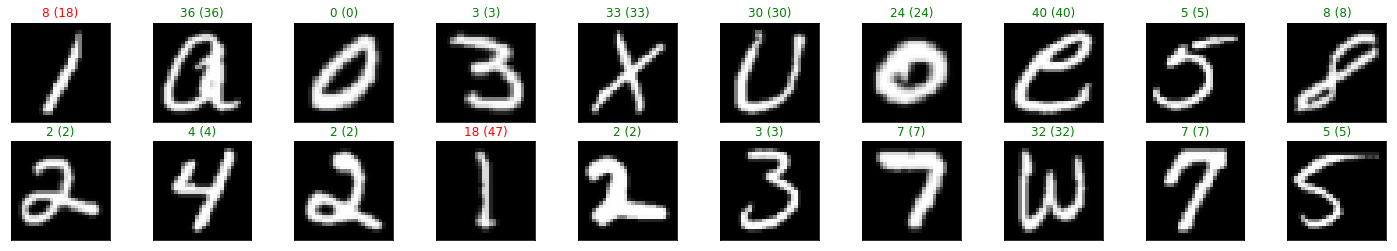

In [11]:
# obtain one batch of test images
images, labels = x_test[:32], y_test[:32]

# get sample outputs
predict = model.predict_on_batch(images)
# convert output probabilities to predicted class
preds = np.argmax(predict, axis=1)
labels = np.argmax(labels, axis=1)

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(images[idx].reshape((28, 28)), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx]), str(labels[idx])),
                 color=("green" if preds[idx]==labels[idx] else "red"))

# Transfer Learning

In [0]:
pip install git+https://www.github.com/keras-team/keras-contrib.git

In [0]:
import keras
from keras.applications.resnet50 import ResNet50
from keras_contrib.applications.resnet import ResNet18
#from keras.applications.resnet_v2 import ResNet50V2
#from keras.applications.resnext import ResNeXt50
from keras.layers import Dense, GlobalAveragePooling2D, Input
from keras.models import Model, load_model
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [0]:
batch_size = 4096
epochs = 10
es = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
callbacks = [es]
num_classes = 62
input_shape = (28, 28, 3)

In [0]:
x_train = np.stack([x_train] * 3, axis=-1)
x_test = np.stack([x_test] * 3, axis=-1)

In [0]:
#  split train dataset into train 98% and valid 2%
(x_train, x_valid, y_train, y_valid) = train_test_split(x_train, y_train, test_size=0.02,
                                                random_state=42)

print ('[INFO] Training shape: ', x_train.shape, y_train.shape)
print ('[INFO] Validation shape: ', x_valid.shape, y_valid.shape)
print ('[INFO] Test shape: ', x_test.shape, y_test.shape)

[INFO] Training shape:  (683973, 28, 28, 3) (683973, 62)
[INFO] Validation shape:  (13959, 28, 28, 3) (13959, 62)
[INFO] Test shape:  (116323, 28, 28, 3) (116323, 62)


In [0]:
dataset = dict({
    'x_train' : x_train,
    'y_train' : y_train,
    'x_valid' : x_valid,
    'y_valid' : y_valid,
    'x_test' : x_test,
    'y_test' : y_test
})

In [0]:
def train_generator(dataset, shuff_index, batch_size):
    num_iters = int(np.ceil(dataset['x_train'].shape[0] / batch_size))
    while 1:
        for i in range(num_iters):
            idx = shuff_index[i*batch_size:(i+1)*batch_size]
            tmp = dataset['x_train'][idx].astype('float32')
            tmp -= np.mean(dataset['x_train'], axis=0, keepdims=True)
            tmp /= 255.0
            yield tmp, dataset['y_train'][idx]

In [0]:
def valid_generator(dataset, batch_size):
    num_iters = int(np.ceil(dataset['x_valid'].shape[0] / batch_size))
    while 1:
        for i in range(num_iters):
            tmp = dataset['x_valid'][i*batch_size:(i+1)*batch_size].astype('float32')
            tmp -= np.mean(dataset['x_train'], axis=0, keepdims=True)
            tmp /= 255.0
            yield tmp, dataset['y_valid'][i*batch_size:(i+1)*batch_size]

In [0]:
#get the batches from generator
shuff_index = np.random.permutation(dataset['x_train'].shape[0])
trn_generator = train_generator(dataset, shuff_index, batch_size=batch_size)
val_generator = valid_generator(dataset, batch_size=batch_size)

iters_train = int(np.ceil(dataset['x_train'].shape[0] / float(batch_size)))
iters_test = int(np.ceil(dataset['x_valid'].shape[0] / float(batch_size)))

print ('Number:', iters_train, iters_test)

Number: 167 4


### Resnet50 Imagenet Pretrained Model

In [0]:
input_tensor = Input(shape=input_shape)
base_model = ResNet50(weights='imagenet', include_top=False, 
                      input_tensor=input_tensor)
#base_model = ResNet50V2(weights='imagenet', include_top=False)
#base_model = ResNeXt50(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer with 62 classes
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.summary()

W0804 19:41:49.794712 140124642039680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0804 19:41:49.798008 140124642039680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0804 19:41:49.807011 140124642039680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0804 19:41:49.832144 140124642039680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0804 19:41:49.832957

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 3)    0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 34, 34, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 14, 14, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 14, 14, 64)   256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [0]:
# freeze all convolutional resnet layers
for layer in base_model.layers:
    layer.trainable = False

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['acc'])

W0804 20:06:55.891784 140449134294912 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [0]:
#train the model using fit_generator
history = model.fit_generator(
            generator=trn_generator,
            steps_per_epoch=iters_train,
            epochs=epochs,
            callbacks=callbacks,
            validation_data=val_generator,
            validation_steps=iters_test,
            use_multiprocessing=True,
            shuffle=True
        )

W0804 19:41:58.618039 140124642039680 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
167/167 [==============================] - 324s 2s/step - loss: 1.4679 - acc: 0.6081 - val_loss: 6.1604 - val_acc: 0.0532
Epoch 2/10
167/167 [==============================] - 302s 2s/step - loss: 0.9676 - acc: 0.7107 - val_loss: 6.6290 - val_acc: 0.0511
Epoch 3/10
167/167 [==============================] - 310s 2s/step - loss: 0.8033 - acc: 0.7550 - val_loss: 7.2253 - val_acc: 0.0635
Epoch 4/10
167/167 [==============================] - 309s 2s/step - loss: 0.6772 - acc: 0.7922 - val_loss: 7.8741 - val_acc: 0.0624
Epoch 00004: early stopping


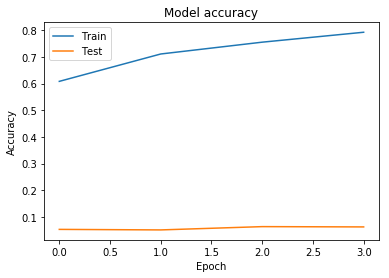

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### ResNet18 Scratch Model

In [0]:
base_model = ResNet18(input_shape, num_classes)

model = Model(inputs=base_model.input, outputs=base_model.output)
model.summary()

W0805 03:53:43.826295 139893684635520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0805 03:53:43.830656 139893684635520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0805 03:53:43.837222 139893684635520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0805 03:53:43.869061 139893684635520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0805 03:53:43.869916

reshaping via a convolution...
reshaping via a convolution...
reshaping via a convolution...
reshaping via a convolution...
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 14, 14, 64)   9472        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 14, 14, 64)   256         conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 14, 14, 64)   0           batch_normalization

In [0]:
# freeze all convolutional resnet layers
for layer in base_model.layers:
    layer.trainable = False

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['acc'])

W0805 03:54:09.518040 139893684635520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [0]:
#train the model using fit_generator
history = model.fit_generator(
            generator=trn_generator,
            steps_per_epoch=iters_train,
            epochs=epochs,
            callbacks=callbacks,
            validation_data=val_generator,
            validation_steps=iters_test,
            use_multiprocessing=True,
            shuffle=True
        )

Epoch 1/10
167/167 [==============================] - 301s 2s/step - loss: 5.6533 - acc: 0.0178 - val_loss: 9.9879 - val_acc: 0.0448
Epoch 2/10
167/167 [==============================] - 282s 2s/step - loss: 5.6533 - acc: 0.0178 - val_loss: 9.9879 - val_acc: 0.0448
Epoch 3/10
167/167 [==============================] - 285s 2s/step - loss: 5.6533 - acc: 0.0178 - val_loss: 9.9879 - val_acc: 0.0448
Epoch 4/10
167/167 [==============================] - 282s 2s/step - loss: 5.6533 - acc: 0.0178 - val_loss: 9.9879 - val_acc: 0.0448
Epoch 00004: early stopping


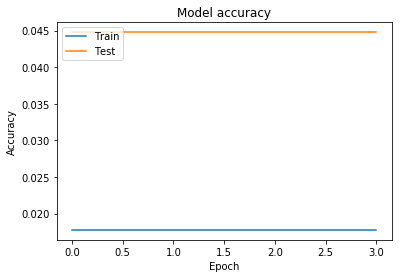

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()